# Imports

In [2]:
import os
import glob
import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
train_anno = pd.read_csv("train-rle.csv")
print(train_anno.shape)

(11582, 2)


In [12]:
train_anno_unique = train_anno.drop_duplicates(["ImageId"])
print(train_anno_unique.shape)
train_anno_unique_original = train_anno_unique.copy()

(10675, 2)


In [4]:
train_anno_unique.loc[train_anno_unique["EncodedPixels"] != " -1", "EncodedPixels"] = "1"

/var/folders/d0/k5pp1mc555bcl1qs6mvttwt40000gn/T/ipykernel_10214/1183727375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_anno_unique.loc[train_anno_unique["EncodedPixels"] != " -1", "EncodedPixels"] = "1"


In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_anno_unique["ImageId"],
                                                    train_anno_unique["EncodedPixels"],
                                                    test_size=0.2,
                                                    stratify=train_anno_unique["EncodedPixels"],
                                                    random_state=42069)

In [6]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=69420)

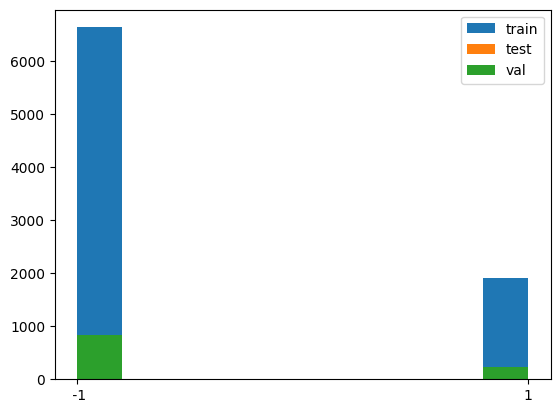

In [7]:
plt.hist(y_train, label= "train")
plt.hist(y_test, label= "test")
plt.hist(y_val, label= "val")
plt.legend()
plt.show()

In [8]:
train_split_anno = train_anno[train_anno["ImageId"].isin(X_train)]
test_split_anno = train_anno[train_anno["ImageId"].isin(X_test)]
val_split_anno = train_anno[train_anno["ImageId"].isin(X_val)]

In [9]:
train_split_anno.to_csv("./mask_annotations_stratified_split/train_split_anno.csv", index=None)
test_split_anno.to_csv("./mask_annotations_stratified_split/test_split_anno.csv", index=None)
val_split_anno.to_csv("./mask_annotations_stratified_split/val_split_anno.csv", index=None)

In [10]:
print(train_split_anno.shape)
print(val_split_anno.shape)
print(test_split_anno.shape)

(9230, 2)
(1185, 2)
(1167, 2)


# Splitting OBB files

In [ ]:
bb_full = pd.read_json("obb_full_mask_output.json")

In [13]:
bb_train = bb_full.loc[bb_full["image_id"].isin(train_split_anno["ImageId"])]
bb_val = bb_full.loc[bb_full["image_id"].isin(val_split_anno["ImageId"])]
bb_test = bb_full.loc[bb_full["image_id"].isin(test_split_anno["ImageId"])]

In [ ]:
bb_train.to_json("./obb_annotations_stratified_split/bb_train_split_anno.json", orient='records', indent=2, index=None)
bb_val.to_json("./obb_annotations_stratified_split/bb_val_split_anno.json", orient='records', indent=2, index=None)
bb_test.to_json("./obb_annotations_stratified_split/bb_test_split_anno.json", orient='records', indent=2, index=None)

# Splitting regular BB files

In [5]:
train_split_anno = pd.read_csv("mask_annotations_stratified_split/train_split_anno.csv")
val_split_anno = pd.read_csv("mask_annotations_stratified_split/val_split_anno.csv")
test_split_anno = pd.read_csv("mask_annotations_stratified_split/test_split_anno.csv")

In [6]:
bb_full = pd.read_json("bb_full_mask_output.json")

bb_train = bb_full.loc[bb_full["image_id"].isin(train_split_anno["ImageId"])]
bb_val = bb_full.loc[bb_full["image_id"].isin(val_split_anno["ImageId"])]
bb_test = bb_full.loc[bb_full["image_id"].isin(test_split_anno["ImageId"])]

In [7]:
bb_train.to_json("./bb_annotations_stratified_split/bb_train_split_anno_xywh_norm.json", orient='records', indent=2, index=None)
bb_val.to_json("./bb_annotations_stratified_split/bb_val_split_anno_xywh_norm.json", orient='records', indent=2, index=None)
bb_test.to_json("./bb_annotations_stratified_split/bb_test_split_anno_xywh_norm.json", orient='records', indent=2, index=None)

# Split OBB with Areas 

In [3]:
train_split_anno = pd.read_csv("mask_annotations_stratified_split/train_split_anno.csv")
val_split_anno = pd.read_csv("mask_annotations_stratified_split/val_split_anno.csv")
test_split_anno = pd.read_csv("mask_annotations_stratified_split/test_split_anno.csv")

In [4]:
bb_full = pd.read_json("obb_full_mask_output.json")

bb_train = bb_full.loc[bb_full["image_id"].isin(train_split_anno["ImageId"])]
bb_val = bb_full.loc[bb_full["image_id"].isin(val_split_anno["ImageId"])]
bb_test = bb_full.loc[bb_full["image_id"].isin(test_split_anno["ImageId"])]

In [5]:
bb_train.to_json("./obb_annotations_stratified_split/annos_with_areas/all_annotations/obb_train_split_anno_with_areas.json", orient='records', indent=2, index=None)
bb_val.to_json("./obb_annotations_stratified_split/annos_with_areas/all_annotations/obb_val_split_anno_with_areas.json", orient='records', indent=2, index=None)
bb_test.to_json("./obb_annotations_stratified_split/annos_with_areas/all_annotations/obb_test_split_anno_with_areas.json", orient='records', indent=2, index=None)